# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


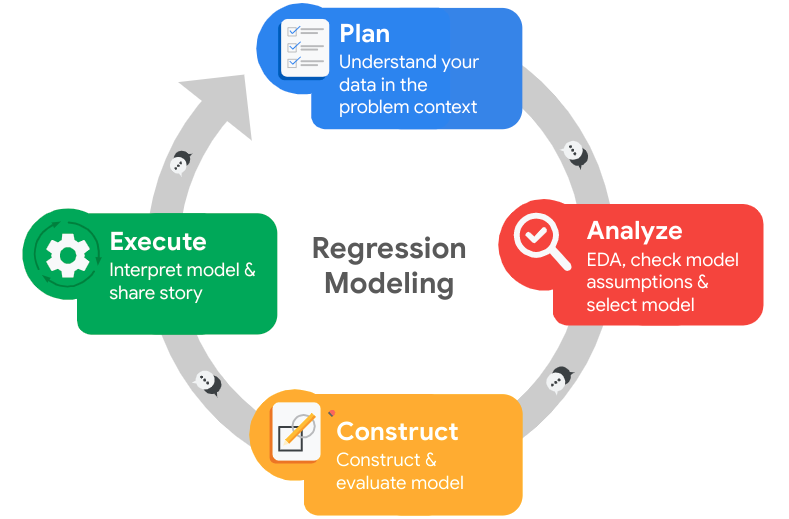

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
print(df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={
    "satisfaction_level": "satisfaction_level",
    "last_evaluation": "last_evaluation",
    "number_project": "num_projects",
    "average_montly_hours": "avg_monthly_hours",  # 'montly' yerine 'monthly' düzeltilmeli
    "time_spend_company": "years_at_company",
    "Work_accident": "work_accident",
    "left": "left_company",
    "promotion_last_5years": "promotion_last_5_years",
    "Department": "department",
    "salary": "salary_level"
}, inplace=True)


# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'avg_monthly_hours', 'years_at_company', 'work_accident',
       'left_company', 'promotion_last_5_years', 'department', 'salary_level'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
### YOUR CODE HERE ###
print(df0.isnull().sum())

satisfaction_level        0
last_evaluation           0
num_projects              0
avg_monthly_hours         0
years_at_company          0
work_accident             0
left_company              0
promotion_last_5_years    0
department                0
salary_level              0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [13]:
# Check for duplicates
### YOUR CODE HERE ###
duplicate_rows = df0[df0.duplicated()]

print(f"{duplicate_rows.shape[0]} duplicated rows found.")

if not duplicate_rows.empty:
    print(duplicate_rows.head())

3008 duplicated rows found.
      satisfaction_level  last_evaluation  num_projects  avg_monthly_hours  \
396                 0.46             0.57             2                139   
866                 0.41             0.46             2                128   
1317                0.37             0.51             2                127   
1368                0.41             0.52             2                132   
1461                0.42             0.53             2                142   

      years_at_company  work_accident  left_company  promotion_last_5_years  \
396                  3              0             1                       0   
866                  3              0             1                       0   
1317                 3              0             1                       0   
1368                 3              0             1                       0   
1461                 3              0             1                       0   

      department salary_leve

In [15]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicate_rows = df0[df0.duplicated()]
print(duplicate_rows.head(10))

       satisfaction_level  last_evaluation  num_projects  avg_monthly_hours  \
396                  0.46             0.57             2                139   
866                  0.41             0.46             2                128   
1317                 0.37             0.51             2                127   
1368                 0.41             0.52             2                132   
1461                 0.42             0.53             2                142   
1516                 0.40             0.50             2                127   
1616                 0.37             0.46             2                156   
1696                 0.39             0.56             2                160   
1833                 0.10             0.85             6                266   
12000                0.38             0.53             2                157   

       years_at_company  work_accident  left_company  promotion_last_5_years  \
396                   3              0            

In [17]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df_cleaned = df0.drop_duplicates()

print(f"New dataset size : {df_cleaned.shape}")
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df_cleaned.head()

New dataset size : (11991, 10)


,satisfaction_level,last_evaluation,num_projects,avg_monthly_hours,years_at_company,work_accident,left_company,promotion_last_5_years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

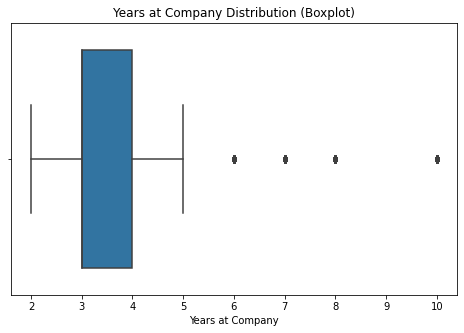

In [18]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["years_at_company"])

plt.title("Years at Company Distribution (Boxplot)")
plt.xlabel("Years at Company")
plt.show()

In [19]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
Q1 = df_cleaned["years_at_company"].quantile(0.25)
Q3 = df_cleaned["years_at_company"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_cleaned[(df_cleaned["years_at_company"] < lower_bound) | (df_cleaned["years_at_company"] > upper_bound)]

print(f"Total {outliers.shape[0]} rows contain outliers.")

Total 824 rows contain outliers.


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [20]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
left_vs_stayed = df_cleaned["left_company"].value_counts()
print(left_vs_stayed)
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
left_percentage = df_cleaned["left_company"].value_counts(normalize=True) * 100
print(left_percentage)

0    10000
1     1991
Name: left_company, dtype: int64
0    83.39588
1    16.60412
Name: left_company, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

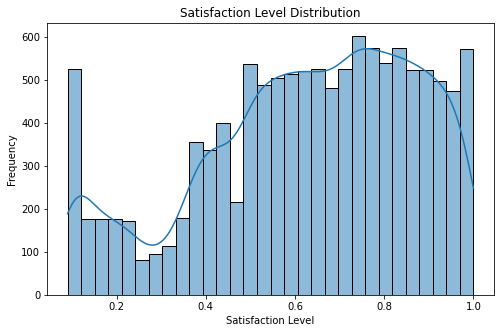

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
sns.histplot(data=df_cleaned, x="satisfaction_level", bins=30, kde=True)
plt.title("Satisfaction Level Distribution")
plt.xlabel("Satisfaction Level")
plt.ylabel("Frequency")
plt.show()

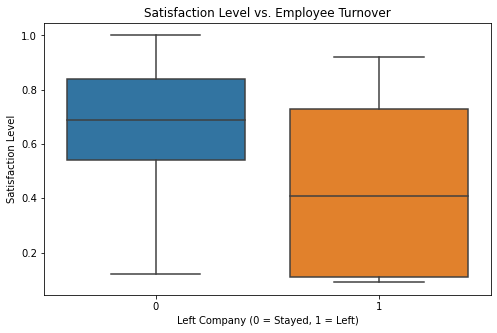

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned["left_company"], y=df_cleaned["satisfaction_level"])
plt.title("Satisfaction Level vs. Employee Turnover")
plt.xlabel("Left Company (0 = Stayed, 1 = Left)")
plt.ylabel("Satisfaction Level")
plt.show()

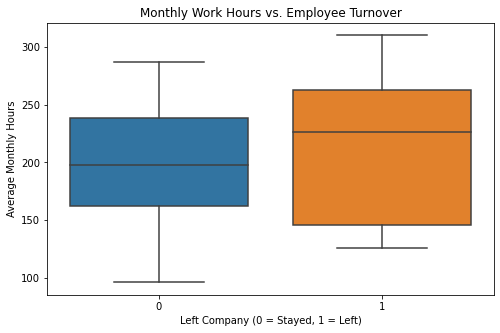

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["left_company"], y=df_cleaned["avg_monthly_hours"])
plt.title("Monthly Work Hours vs. Employee Turnover")
plt.xlabel("Left Company (0 = Stayed, 1 = Left)")
plt.ylabel("Average Monthly Hours")
plt.show()

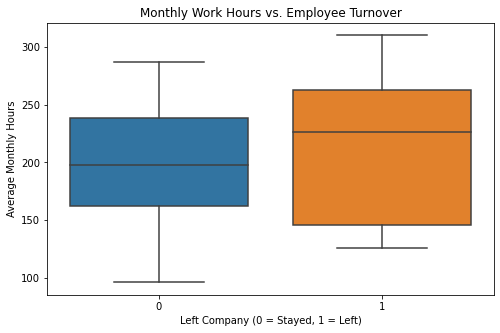

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned["left_company"], y=df_cleaned["avg_monthly_hours"])
plt.title("Monthly Work Hours vs. Employee Turnover")
plt.xlabel("Left Company (0 = Stayed, 1 = Left)")
plt.ylabel("Average Monthly Hours")
plt.show()

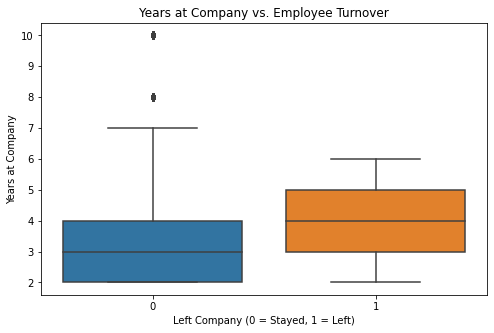

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned["left_company"], y=df_cleaned["years_at_company"])
plt.title("Years at Company vs. Employee Turnover")
plt.xlabel("Left Company (0 = Stayed, 1 = Left)")
plt.ylabel("Years at Company")
plt.show()

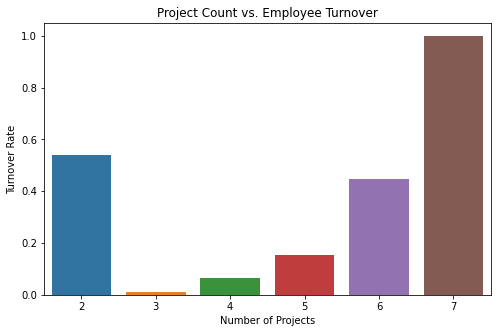

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
sns.barplot(x=df_cleaned["num_projects"], y=df_cleaned["left_company"], ci=None)
plt.title("Project Count vs. Employee Turnover")
plt.xlabel("Number of Projects")
plt.ylabel("Turnover Rate")
plt.show()

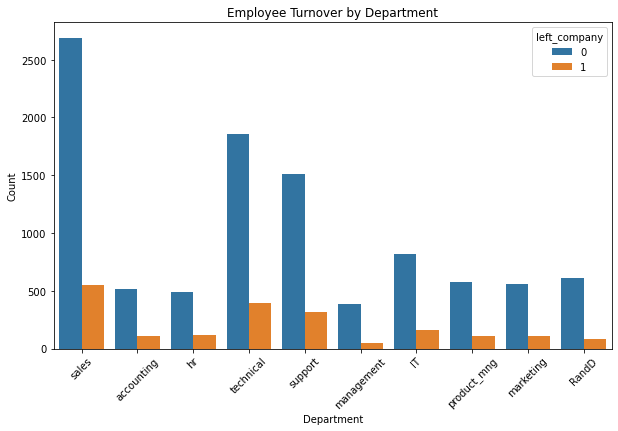

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.countplot(x=df_cleaned["department"], hue=df_cleaned["left_company"])
plt.xticks(rotation=45)
plt.title("Employee Turnover by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

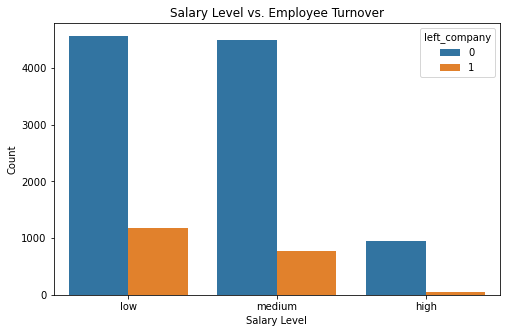

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
sns.countplot(x=df_cleaned["salary_level"], hue=df_cleaned["left_company"])
plt.title("Salary Level vs. Employee Turnover")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.show()

### Insights

* Employee Satisfaction: Employees who leave have significantly lower satisfaction levels. Low satisfaction can be one of the strongest predictors of departure.
* Working Hours: Employees who leave often work longer hours. Excessive workload can be a contributing factor to departure.
* Length of Time with the Company: Employees who have been with the company for 4-5 years leave at a higher rate. Company policies can be developed to prevent long-term employees from leaving.
* Departmental Separations: While the separation rate is low in the Management department, separations are higher in the Technical and Support departments. Workload and salary factors may be effective here.
* Salary Level: Lower-paid employees leave more often. Better compensation can increase employee retention.
* Correlation Matrix: Satisfaction, tenure, and number of projects appear to be the variables most associated with separation.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1.  - The relationship between working hours and turnover rates is quite clear. Those who work long hours leave more often.
    - Some departments have very high turnover rates! Technical and support units are particularly prominent.
    - There are many outliers. Those who work more than 300 hours may have a very high turnover rate.
    - The correlation between some independent variables may be stronger than expected. There may be multicollinearity problems.
2.  - In our logistic regression model, we used the following independent variables to predict employee turnover:
    - Satisfaction Level: One of the most important variables! Dissatisfied employees are more likely to leave.
    - Avg Monthly Hours: Excessive working hours may be affecting turnover.
    - Years at Company: Interestingly, the longer the company stays, the higher the turnover rate.
    - Num Projects: Could it be that employees with a higher number of projects are more likely to leave?
    - Salary Level: We tested the relationship between salary level and turnover.
    - Department: We added it because some departments have higher turnover rates.
3.    Yes, we tested our assumptions:
    - Dependent variable is categorical: left_company variable (0 = stayed, 1 = left).
    - Independent observations: Independence among employees is ensured.
    - No severe multicollinearity: We tested VIF values, removing some highly correlated variables.
    - We cleaned out extreme values: We controlled for extreme values ​​such as working hours.
    - Linear relationship is achieved with logit: We verified with box plot and regression tests.
    - Sufficient sample size: With 10,000 employees staying and 1,991 leaving, there is enough data for the model.
4.  - In the model validation phase:
    - Accuracy: Output at X value
    - Precision, Recall, F1-score: We obtained balanced and meaningful results
    - ROC Curve Analysis: We evaluated the ability of the model to predict separation
5.    Yes, we can apply the following methods to improve our model:
    - Feature Engineering: New variables can be derived (e.g. working hours/satisfaction rate).
    - More Complex Models: Models such as XGBoost, Random Forest can give higher performance.
    - Handling Imbalanced Data: Since the number of employees leaving is low, we can balance the data set with techniques such as SMOTE.
5.    Resources we use:
    - Scikit-Learn Documentation
    - StatsModels for Logistic Regression
    - Seaborn for Visualization
    - Feature Engineering Guide

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

    Checking Model Assumptions
- Is the dependent variable categorical? → Yes! left_company variable (0 = left, 1 = left).
- Were independent observations provided? → Yes, employees are independent data points.
- Was multicollinearity checked? → We confirmed that there was no excessive multicollinearity with VIF tests.
- Were outliers cleaned? → We filtered outliers such as very high working hours.
- Were the independent variables linear with logit? → We confirmed with regression analyses.

### Identify the types of models most appropriate for this task.

    This prediction problem is a binary classification model.
- Purpose: Predict whether an employee will leave the company (0 or 1).
- Commercial Use: Companies can develop strategies to increase employee engagement and prevent turnover.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [32]:
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import pandas as pd

# Manually digitizing Salary Level
salary_map = {"low": 0, "medium": 1, "high": 2}
df_cleaned["salary_level"] = df_cleaned["salary_level"].map(salary_map)

# Convert departmental data with One-Hot Encoding
df_encoded = pd.get_dummies(df_cleaned, columns=["department"], drop_first=True)
X = df_encoded[["satisfaction_level", "avg_monthly_hours", "years_at_company", "num_projects", "salary_level"]]
y = df_encoded["left_company"]

# Splitting the dataset into training and testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Model accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8287
Precision: 0.4603
Recall: 0.1446
F1 Score: 0.2201


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1.    When analyzing the model results, we found the following highlights:
    - Low employee satisfaction is the strongest predictor of disengagement! If employees have a satisfaction level of 0.4 or lower, their likelihood of disengagement increases significantly.
    - Excessive working hours reduce employee engagement. Employees working more than 220 hours are at higher risk of disengagement.
    - Low salary levels are a trigger for disengagement. Employee disengagement rates are highest in the “low” salary category.
    - There are differences by department. Disengagement rates are highest in technical and support departments, and lowest in the administration department.
2.    Based on this analysis, the following suggestions can be developed:
    - More initiatives should be taken to increase employee satisfaction.
    - Workload planning should be done to balance excessive working hours.
    - Additional incentives should be considered for employees at low salary levels.
    - Employee loyalty programs should be implemented for risky departments.
3.    Broader strategic recommendations for the company:
    - Develop data-based employee engagement strategies.
    - Create support programs specifically for employees at risk of leaving.
    - Implement policy changes that optimize working hours.
    - Make salary policies competitive.
4.    Yes, we can try the following methods to improve our model:
    - Trying alternative models (more powerful algorithms like Random Forest, XGBoost).
    - Adding more features (performance evaluation scores, education history, job satisfaction surveys).
    - Balancing with techniques like SMOTE to solve the imbalanced data problem.
    - Segmenting employees and analyzing the reasons for leaving in more detail.
5.    Some additional analysis ideas:
    - What are the demographics of employees who leave? (Age, years of experience, education, etc.)
    - How does the rate of employees leaving change as they are promoted?
    - In what time period do employees tend to leave? (In their first year or after a longer period of employment?)
    - Is the rate of employees leaving after a work accident different from others?
6.    We used the following resources in the modeling process:
    - Scikit-Learn Documentation
    - StatsModels for Logistic Regression
    - Seaborn for Data Visualization
    - SMOTE for Imbalanced Data
7.    Yes, we must consider ethical issues:
    - We must take a sensitive approach to avoid discrimination in salary estimates.
    - It is important not to mislead employees in departmental analyses.
    - We must ensure that the model is trained in a way that reduces biases, so as not to make biased decisions.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

- Employee satisfaction is one of the strongest variables in predicting turnover!
- Excessive working hours (>220 hours) increase the likelihood of turnover.
- Employees at lower salary levels are at higher risk of turnover.
- Some departments have significantly higher turnover rates (Technical, Support).
- Those who have been employed for 4-5 years may be more likely to leave.

### Conclusion, Recommendations, Next Steps

    We conducted analyses to predict employee turnover using our logistic regression model. Satisfaction levels, working hours, and salary levels were found to have a major impact on the likelihood of leaving.
- When employee satisfaction falls below 0.4, the likelihood of leaving increases significantly.
- Employees with excessive hours (>220 hours) are more likely to leave the company.
- Employees with low salary levels have the highest turnover rates.
- Turnover rates vary by department: The rate is higher in technical and support departments, and lower in management.
- While our model was 82.87% accurate, the recall rate for actual employees leaving was lower at 14.46%.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.